In [106]:
#import all required library

#data wrangling 
import pandas as pd 
import numpy as np
import sqlite3 

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns 


#helper 
from IPython.display import display

#CONSTANT
DB_PATH = '/work/olist.db'

#CONNECT DATABASE
connect = sqlite3.connect(DB_PATH)
cursor = connect.cursor()

## OBJECTIVES :
1. Which Payment Options has the biggest share overtime

2. Does the order in weekend is greater than weekday 

3. Where states whose  sell value is higher than buy value ?



### Objective 1 
Which Payment Options has the biggest share overtime

In [125]:
PAYMENT_SQL = '''
SELECT a.order_id,a.payment_sequential,a.payment_type,a.payment_installments,a.payment_value,b.order_purchase_timestamp FROM olist_order_payments_dataset a
INNER JOIN olist_order_dataset b ON b.order_id = a.order_id'''


In [127]:
#fetch the data 
query_payment = pd.read_sql(PAYMENT_SQL,con=connect)

In [128]:
#check missing values 
print('Null Checking')
display(query_payment.isnull().sum())
print('Duplicate Data  Checking')
display(query_payment.duplicated().sum())

#drop duplicate data 
query_payment = query_payment.drop_duplicates()
print('After Remove Duplicate Data')
display(query_payment.duplicated().sum())

Null Checking


order_id                    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
order_purchase_timestamp    0
dtype: int64

Duplicate Data  Checking


0

After Remove Duplicate Data


0

In [130]:
#check dtypes
print('Dtypes : ')
display(query_payment.dtypes)
#since the timestamp is object we need to convert to become datetime so that we could parse datetime component 
query_payment['order_purchase_timestamp'] = pd.to_datetime(query_payment['order_purchase_timestamp'])
query_payment['Year'] = query_payment['order_purchase_timestamp'].dt.year

print('Dtypes After conversion')
display(query_payment.dtypes)

Dtypes : 


order_id                     object
payment_sequential            int64
payment_type                 object
payment_installments          int64
payment_value               float64
order_purchase_timestamp     object
dtype: object

Dtypes After conversion


order_id                            object
payment_sequential                   int64
payment_type                        object
payment_installments                 int64
payment_value                      float64
order_purchase_timestamp    datetime64[ns]
Year                                 int64
dtype: object

In [ ]:

payment_type_share = (query_payment
      .groupby("Year")["payment_type"] # group by year and payment typee to see which payment type dominate 
      .value_counts(normalize=True) # calculate share 
      .mul(100)
      .round(2)
      .unstack())
payment_type_share

payment_type,boleto,credit_card,debit_card,not_defined,voucher
Year,,,,,
2016,18.21,74.57,0.58,NaN,6.65
2017,20.01,72.74,0.89,NaN,6.37
2018,18.23,74.92,1.97,0.01,4.86


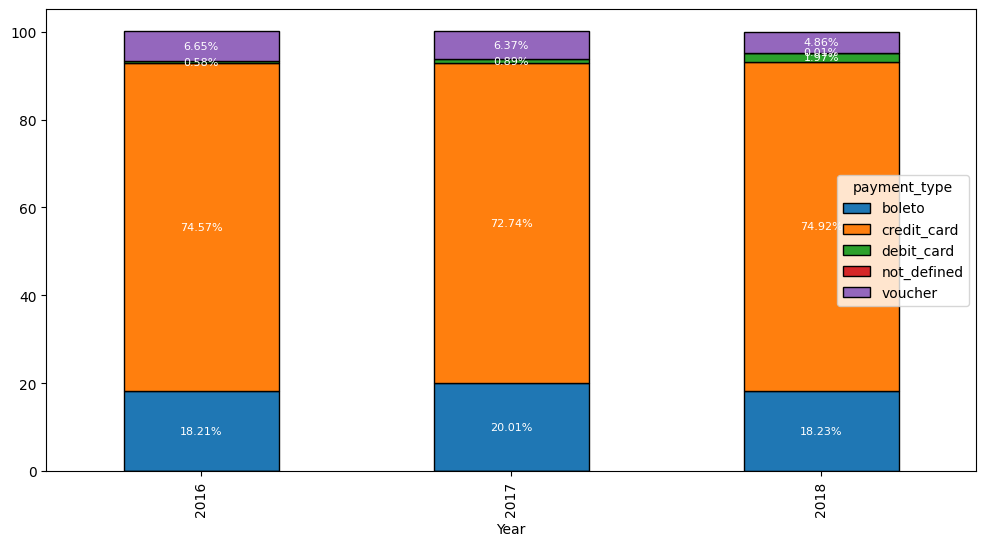

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
payment_type_share.plot(kind = "bar",
        stacked = True,
        ax = ax,
        edgecolor = "black")
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 color = 'white',
                 size = 8) # add a container object "c" as first 

#### Insight1 : 
From the payment type share over 2016 to 2018 : 
1. There is slight increase in debit_card as payment tools, 
2. Credit Card has the biggest share , the trend still increase
3. Voucher payment type is decreasing 

In [ ]:
# from raw value to percentage
total = query_payment.groupby('Year')['payment_value'].sum().reset_index()
total['payment_value'] = [i / j * 100 for i,j in zip(total['payment_value'], total['payment_value'])]


credit_card = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['payment_value'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]




# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="Year",  y="payment_value", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

,payment_type,Year,payment_value
0,boleto,2016,9679.06
1,boleto,2017,1396063.37
2,boleto,2018,1463618.84
3,credit_card,2016,48562.48
4,credit_card,2017,5637373.94
5,credit_card,2018,6856147.77
6,debit_card,2016,241.73
7,debit_card,2017,43326.47
8,debit_card,2018,174421.59
9,not_defined,2018,0.00


### Objective 2 
 
Which Payment Options has the biggest share overtime

In [133]:
ORDER_SQL = '''SELECT  order_purchase_timestamp,order_id
    FROM olist_order_dataset'''


In [134]:
#query the data
query_result_order = pd.read_sql(ORDER_SQL,con=connect)

In [135]:
#check missing values 
print('Null Checking')
display(query_result_order.isnull().sum())
print('Duplicate Data  Checking')
display(query_result_order.duplicated().sum())

#drop duplicate data 
query_result_order = query_result_order.drop_duplicates()
print('After Remove Duplicate Data')
display(query_result_order.duplicated().sum())

Null Checking


order_purchase_timestamp    0
order_id                    0
dtype: int64

Duplicate Data  Checking


0

After Remove Duplicate Data


0

In [136]:
#check dtypes
print('Dtypes : ')
display(query_result_order.dtypes)
#since the timestamp is object we need to convert to become datetime so that we could parse datetime component 
query_result_order['order_purchase_timestamp'] = pd.to_datetime(query_result_order['order_purchase_timestamp'])
query_result_order['Day'] = query_result_order['order_purchase_timestamp'].dt.day_name()    # parse day name 
query_result_order['Hour'] = query_result_order['order_purchase_timestamp'].dt.hour # parse hour 

print('Dtypes After conversion')
display(query_result_order.dtypes)

Dtypes : 


order_purchase_timestamp    object
order_id                    object
dtype: object

Dtypes After conversion


order_purchase_timestamp    datetime64[ns]
order_id                            object
Day                                 object
Hour                                 int64
dtype: object

In [138]:
#Find aggregate data between day and hour 
day_hour_group = query_result_order.groupby(['Day','Hour'],as_index=False).agg({'order_id':'count'})
day_hour_group = day_hour_group.pivot(columns='Day',index='Hour',values='order_id')
day_hour_group.index = day_hour_group.index[::-1] # reverse the hour 
day_hour_group=  day_hour_group[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
display(day_hour_group)

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
23,328,306,397,355,426,315,267
22,134,158,179,167,216,175,141
21,66,80,81,75,72,67,69
20,36,28,33,39,49,43,44
19,21,29,33,31,40,25,27
18,22,24,27,28,36,24,27
17,69,71,93,85,97,53,34
16,160,223,211,220,206,106,105
15,479,522,517,502,493,249,205


<AxesSubplot: xlabel='Day', ylabel='Hour'>

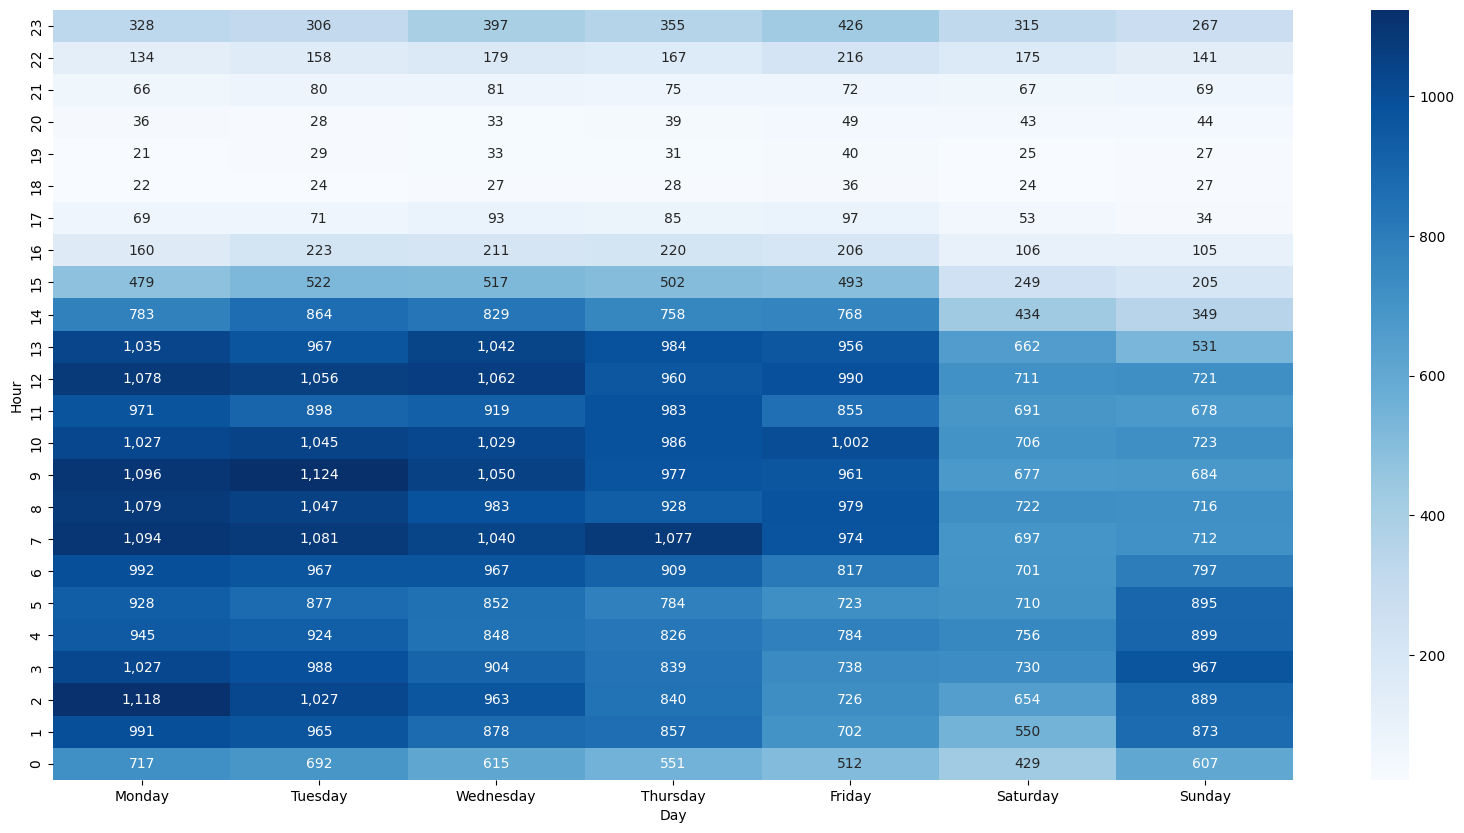

In [140]:
#create heatmap to find density each day hour order count
plt.figure(figsize=(20,10))
sns.heatmap(day_hour_group,annot=True,cmap='Blues',fmt=',')

#### Insight2 : 
On Daily Basis the Weekend (Saturday and Sunday) order is less than Weekday.We can See the density decrease gradually from Monday to Sunday. In Weekday peak order is in interval 7 to 13 o clock .For Saturday we see stable pattern in  3 to 13 o clock as for Sunday the high order is in 1 to 13 o clock. 

### Objective 3

Where states whose  sell value is higher than buy value ? 

In [123]:
customer_seller_comparison_SQL  = '''SELECT a.order_id, a.price,a.seller_id,b.seller_state, c.customer_id,d.customer_state
FROM olist_order_items_dataset a 
INNER JOIN olist_sellers_dataset b ON a.seller_id = b.seller_id
INNER JOIN olist_order_dataset c ON a.order_id = c.order_id
INNER JOIN olist_order_customer_dataset d ON d.customer_id=c.customer_id
'''


In [124]:
comparison_df = pd.read_sql(customer_seller_comparison_SQL,con=connect)
comparison_df

,order_id,price,seller_id,seller_state,customer_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,48436dade18ac8b2bce089ec2a041202,SP,3ce436f183e68e07877b285a838db11a,RJ
1,00018f77f2f0320c557190d7a144bdd3,239.90,dd7ddc04e1b6c2c614352b383efe2d36,SP,f6dd3ec061db4e3987629fe6b26e5cce,SP
2,000229ec398224ef6ca0657da4fc703e,199.00,5b51032eddd242adc84c38acab88f23d,MG,6489ae5e4333f3693df5ad4372dab6d3,MG
3,00024acbcdf0a6daa1e931b038114c75,12.99,9d7a1d34a5052409006425275ba1c2b4,SP,d4eb9395c8c0431ee92fce09860c5a06,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,df560393f3a51e74553ab94004ba5c87,PR,58dbd0b2d70206bf40e62cd34e84d795,SP
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,b8bc237ba3788b23da09c0f1f3a3288c,SC,b51593916b4b8e0d6f66f2ae24f2673d,MA
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,f3c38ab652836d21de61fb8314b69182,SP,84c5d4fbaf120aae381fad077416eaa0,PR
112647,fffce4705a9662cd70adb13d4a31832d,99.90,c3cfdc648177fdbbbb35635a37472c53,PR,29309aa813182aaddc9b259e31b870e6,SP
112648,fffe18544ffabc95dfada21779c9644f,55.99,2b3e4a2a3ea8e01938cabda2a3e5cc79,SP,b5e6afd5a41800fdf401e0272ca74655,SP


In [116]:
print('Null Checking')
display(comparison_df.isnull().sum())
print('Duplicate Data  Checking')
display(comparison_df.duplicated().sum())

#drop duplicate data 
comparison_df = comparison_df.drop_duplicates()
print('After Remove Duplicate Data')
display(comparison_df.duplicated().sum())

Null Checking


order_id          0
price             0
seller_id         0
seller_state      0
customer_id       0
customer_state    0
dtype: int64

Duplicate Data  Checking


11360

After Remove Duplicate Data


0

In [117]:
seller_df = (comparison_df.groupby(['seller_state','seller_id'],as_index=False)
            .sum('price').groupby('seller_state',as_index=False).sum('price')
            .rename(columns={'price':'sell_value'}))
seller_df

,seller_state,sell_value
0,AC,267.00
1,AM,1177.00
2,BA,266284.07
3,CE,19994.74
4,DF,92182.43
5,ES,42000.22
6,GO,62489.03
7,MA,35771.04
8,MG,937178.42
9,MS,8366.79


In [118]:
buyer_df = (comparison_df.groupby(['customer_state','customer_id'],as_index=False)
            .sum('price').groupby('customer_state',as_index=False).sum('price').
            rename(columns={'price':'buy_value'}))
buyer_df

,customer_state,buy_value
0,AC,1.508086e+04
1,AL,7.683596e+04
2,AM,2.103646e+04
3,AP,1.177347e+04
4,BA,4.729184e+05
5,CE,2.134831e+05
6,DF,2.854924e+05
7,ES,2.575186e+05
8,GO,2.685785e+05
9,MA,1.135937e+05


In [119]:
#join both data 
compare_buy_sell_activity = buyer_df.merge(seller_df,left_on='customer_state',right_on='seller_state',how='left')
compare_buy_sell_activity['seller_state'] = compare_buy_sell_activity['customer_state'].values
compare_buy_sell_activity = compare_buy_sell_activity.fillna(0) # nan assuming that there is no activity on selling
#calculate margin , selling activities - buy activities 
compare_buy_sell_activity['margin_activity'] = compare_buy_sell_activity['sell_value'] - compare_buy_sell_activity['buy_value']

In [120]:
#encode value based on margin activity, if - then consumer_dominant ,seller_dominant

#helper function 
def encode_margin(value) : 
    if value <0 : 
        return 'consumer_dominant'
    elif value == 0 : 
        return 'balanced'
    elif value > 0 : 
        return 'seller_dominant'
compare_buy_sell_activity['margin_category'] = compare_buy_sell_activity['margin_activity'].apply(lambda x : encode_margin(x))

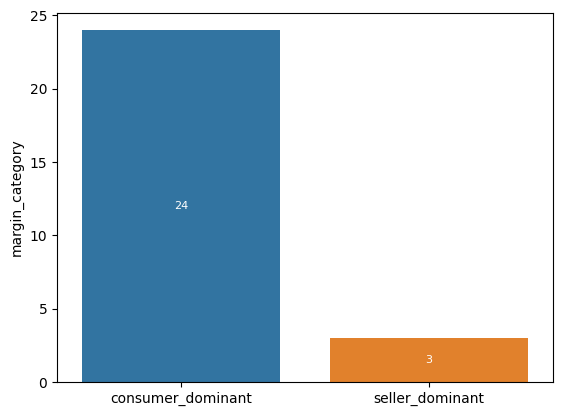

In [121]:
# fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
fig,ax = plt.subplots()
sns.barplot(x=compare_buy_sell_activity['margin_category'].unique(),
y=compare_buy_sell_activity['margin_category'].value_counts(),ax=ax)
for c in ax1.containers:
    labels = [str(int(v.get_height()))  if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 color = 'white',
                 size = 8) # add a container object "c" as first

In [122]:
def highlight_category(v):
    if v == 'consumer_dominant' : 
        return 'background-color:red;'
    else  : 
        return 'background-color:green;'
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

(compare_buy_sell_activity
.set_index('customer_state')[['margin_category','margin_activity']]
.sort_values('margin_category',ascending=False)
.style.applymap(highlight_category)
.background_gradient(cmap='Greens',subset='margin_activity')
)


,margin_category,margin_activity
customer_state,,
SP,seller_dominant,3286912.449999
SC,seller_dominant,119178.490000
PR,seller_dominant,538553.060000
AC,consumer_dominant,-14813.860000
PB,consumer_dominant,-91813.910000
SE,consumer_dominant,-53734.600000
RS,consumer_dominant,-345821.720000
RR,consumer_dominant,-6958.520000
RO,consumer_dominant,-40157.880000


#### Insight3 : 
From Analysis Above there are only three states from 27 states where its selling activity generate more than its consuming activity : 
1. SP State (The Highest Margin )
2. SC State 
3. SR State 

From the Consuming activity , the Highest consuming is RJ State

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb1ca835-0abf-4be1-b9fa-478f699ea927' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>